In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib as mpl         
import matplotlib.pyplot as plt 
import seaborn as sns
# Some helper functions to make our plots cleaner with Plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
init_notebook_mode(connected=True)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Timeslot, Day 시각화

In [ ]:
df_Orders = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/time_review.csv")
len(df_Orders)

96338

In [ ]:
df_Orders = df_Orders.sort_values(by="order_timerange",ascending=True)

In [ ]:
df_Orders.loc[df_Orders['order_timerange'] == 0, "order_timerange"] = "NIGHT"
df_Orders.loc[df_Orders['order_timerange'] == 1, "order_timerange"] = "MORNING"
df_Orders.loc[df_Orders['order_timerange'] == 2, "order_timerange"] = "AFTERNOON"
df_Orders.loc[df_Orders['order_timerange'] == 3, "order_timerange"] = "EVENING"

In [ ]:
df_Orders.loc[df_Orders['order_daytwo'] == 0, "order_daytwo"] = "Weekday"
df_Orders.loc[df_Orders['order_daytwo'] == 1, "order_daytwo"] = "Weekend"

In [ ]:
df_Orders.loc[df_Orders['order_day'] == 0, "order_day"] = "Monday"
df_Orders.loc[df_Orders['order_day'] == 1, "order_day"] = "Tuesday"
df_Orders.loc[df_Orders['order_day'] == 2, "order_day"] = "Wednesday"
df_Orders.loc[df_Orders['order_day'] == 3, "order_day"] = "Thursday"
df_Orders.loc[df_Orders['order_day'] == 4, "order_day"] = "Friday"
df_Orders.loc[df_Orders['order_day'] == 5, "order_day"] = "Saturday"
df_Orders.loc[df_Orders['order_day'] == 6, "order_day"] = "Sunday"

In [ ]:
df_Orders = df_Orders.sort_values(by="order_day",ascending=True)

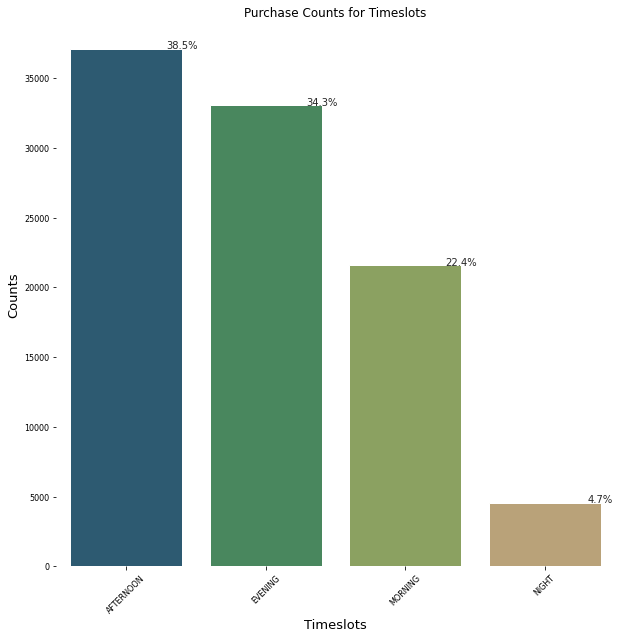

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Purchase Counts for Timeslots', fontsize=12)
sns.set_style('white')
sns.countplot(x=df_Orders['order_timerange'], data=df_Orders, palette='gist_earth')
plt.xticks(fontsize=8, rotation=45)
plt.yticks(fontsize=8)
plt.xlabel('Timeslots', fontsize=13)
p=plt.ylabel('Counts', fontsize=13)
total = float(len(df_Orders['order_timerange']))
plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

In [ ]:
total = []
b = 4 #카테고리 수
c = 5 #카테고리 안에 변수
for i in range(b):
  total.append(len(df_Orders[df_Orders['order_timerange']==i]))
total2 = total * c

In [ ]:
print(total2)

[4573, 21584, 37125, 33056, 4573, 21584, 37125, 33056, 4573, 21584, 37125, 33056, 4573, 21584, 37125, 33056, 4573, 21584, 37125, 33056]


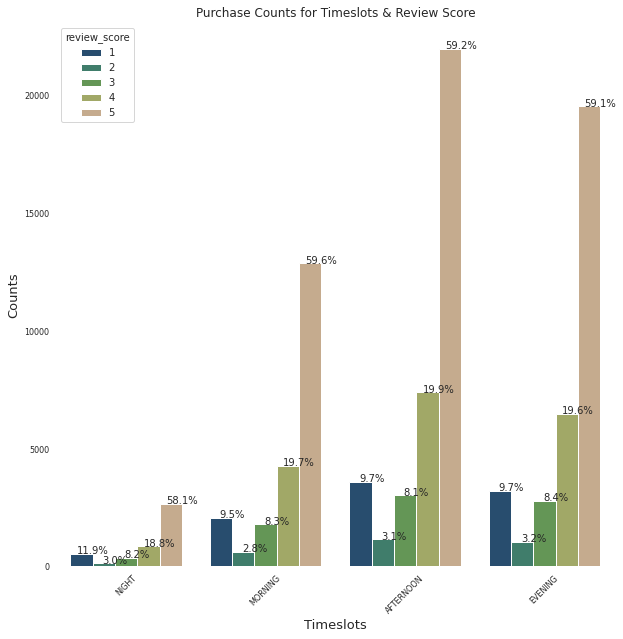

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Purchase Counts for Timeslots & Review Score', fontsize=12)
sns.countplot(x=df_Orders['order_timerange'], data=df_Orders, palette='gist_earth', hue=df_Orders['review_score'])
plt.xticks(fontsize=8, rotation=45)
plt.yticks(fontsize=8)
plt.xlabel('Timeslots', fontsize=13)
p = plt.ylabel('Counts', fontsize=13)
plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
for i, p in enumerate(ax.patches):
    percentage = '{:.1f}%'.format(100 * p.get_height()/total2[i])
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [ ]:
total = []
b = 2 #카테고리 수
c = 5 #카테고리 안에 변수
for i in range(b):
  total.append(len(df_Orders[df_Orders['order_daytwo']==i]))
total2 = total * c
print(total2)

[74185, 22153, 74185, 22153, 74185, 22153, 74185, 22153, 74185, 22153]


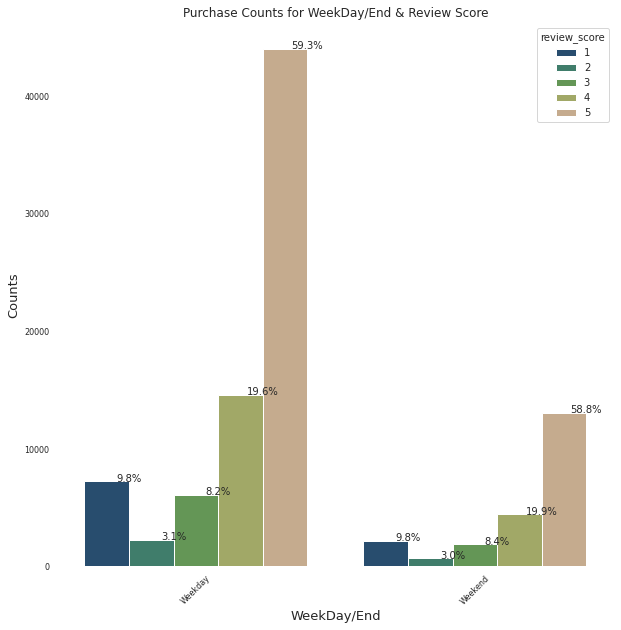

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Purchase Counts for WeekDay/End & Review Score', fontsize=12)
sns.countplot(x=df_Orders['order_daytwo'], data=df_Orders, palette='gist_earth', hue=df_Orders['review_score'])
plt.xticks(fontsize=8, rotation=45)
plt.yticks(fontsize=8)
plt.xlabel('WeekDay/End', fontsize=13)
p = plt.ylabel('Counts', fontsize=13)
plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
for i, p in enumerate(ax.patches):
    percentage = '{:.1f}%'.format(100 * p.get_height()/total2[i])
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()